In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVR
from sklearn.model_selection import KFold
import pandas as pd
from pandas import DataFrame, Series
import seaborn as sns
sns.set(style='ticks', palette='Set2')
%matplotlib inline

In [10]:
#read_file = pd.read_csv ('housing.data.txt', header = None, delim_whitespace= True)
#read_file.to_csv ('housing_data.csv', index=None)

In [11]:
housing = pd.read_csv('housing_data.csv')

In [12]:
X = housing.iloc[:, [0, 12]]
y = housing.iloc[:, 13]

In [13]:
scaler = MinMaxScaler(feature_range=(0, 1))
X = scaler.fit_transform(X)

In [14]:
bias = []
variance_total = []

In [15]:
mean_score = []
variance = []
best_svr = SVR(kernel='rbf')
for i in np.arange(1,100):
    scores = []
    cv = KFold(5, shuffle= True)
    for train_index, test_index in cv.split(X):
        X_train, X_test, y_train, y_test = X[train_index], X[test_index], y[train_index], y[test_index]
        best_svr.fit(X_train, y_train)
        scores.append(best_svr.score(X_test, y_test))
    mean_score.append(np.mean(scores))
    variance.append(np.std(scores))
bias.append(np.mean(mean_score))
variance_total.append(np.std(variance))
print("50 Folds: Mean - " + str(np.mean(mean_score)) + " | Variance - " + str(np.std(variance)))

50 Folds: Mean - 0.5756046264442204 | Variance - 0.01621214575019245


In [16]:
mean_score = []
variance = []
best_svr = SVR(kernel='rbf')
for i in np.arange(1,100):
    scores = []
    cv = KFold(10, shuffle= True)
    for train_index, test_index in cv.split(X):
        X_train, X_test, y_train, y_test = X[train_index], X[test_index], y[train_index], y[test_index]
        best_svr.fit(X_train, y_train)
        scores.append(best_svr.score(X_test, y_test))
    mean_score.append(np.mean(scores))
    variance.append(np.std(scores))
bias.append(np.mean(mean_score))
variance_total.append(np.std(variance))
print("50 Folds: Mean - " + str(np.mean(mean_score)) + " | Variance - " + str(np.std(variance)))

50 Folds: Mean - 0.5833956249966143 | Variance - 0.017251725110677237


In [17]:
mean_score = []
variance = []
best_svr = SVR(kernel='rbf')
for i in np.arange(1,100):
    scores = []
    cv = KFold(20, shuffle= True)
    for train_index, test_index in cv.split(X):
        X_train, X_test, y_train, y_test = X[train_index], X[test_index], y[train_index], y[test_index]
        best_svr.fit(X_train, y_train)
        scores.append(best_svr.score(X_test, y_test))
    mean_score.append(np.mean(scores))
    variance.append(np.std(scores))
bias.append(np.mean(mean_score))
variance_total.append(np.std(variance))
print("50 Folds: Mean - " + str(np.mean(mean_score)) + " | Variance - " + str(np.std(variance)))

50 Folds: Mean - 0.5824509527907801 | Variance - 0.017676315213079788


In [18]:
mean_score = []
variance = []
best_svr = SVR(kernel='rbf')
for i in np.arange(1,100):
    scores = []
    cv = KFold(50, shuffle= True)
    for train_index, test_index in cv.split(X):
        X_train, X_test, y_train, y_test = X[train_index], X[test_index], y[train_index], y[test_index]
        best_svr.fit(X_train, y_train)
        scores.append(best_svr.score(X_test, y_test))
    mean_score.append(np.mean(scores))
    variance.append(np.std(scores))
bias.append(np.mean(mean_score))
variance_total.append(np.std(variance))
print("50 Folds: Mean - " + str(np.mean(mean_score)) + " | Variance - " + str(np.std(variance)))

50 Folds: Mean - 0.5438518638280582 | Variance - 0.07102601150329856


In [19]:
mean_score = []
variance = []
best_svr = SVR(kernel='rbf')
for i in np.arange(1,100):
    scores = []
    cv = KFold(50, shuffle= True)
    for train_index, test_index in cv.split(X):
        X_train, X_test, y_train, y_test = X[train_index], X[test_index], y[train_index], y[test_index]
        best_svr.fit(X_train, y_train)
        scores.append(best_svr.score(X_test, y_test))
    mean_score.append(np.mean(scores))
    variance.append(np.std(scores))
bias.append(np.mean(mean_score))
variance_total.append(np.std(variance))
print("50 Folds: Mean - " + str(np.mean(mean_score)) + " | Variance - " + str(np.std(variance)))

50 Folds: Mean - 0.5426904073913306 | Variance - 0.2241660726495882


In [20]:
k = [5, 10, 20, 50, 100]

Text(0, 0.5, 'Bias')

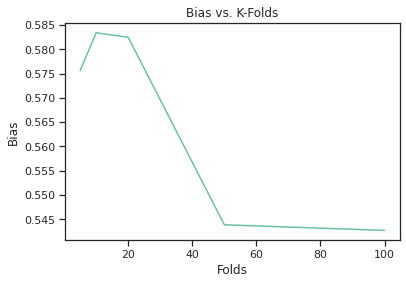

In [21]:
plt.plot(k, bias)
plt.title('Bias vs. K-Folds')
plt.xlabel('Folds')
plt.ylabel('Bias')

Text(0, 0.5, 'Variance')

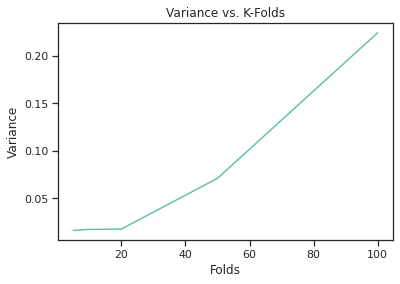

In [22]:
plt.plot(k, variance_total)
plt.title('Variance vs. K-Folds')
plt.xlabel('Folds')
plt.ylabel('Variance')

In [23]:
v = np.array(variance_total)

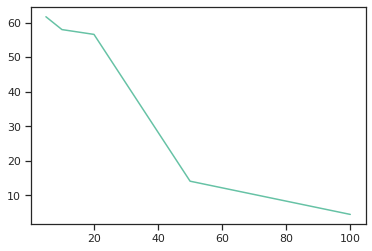

In [24]:
plt.plot(k, 1/v)
plt.title('Inverse Variance vs. K-Folds')
plt.xlabel('Folds')
plt.ylabel('Inverse Variance')

In [ ]:
# Looking at this simulation, it seems as though the claim that bias increases as variance decreases is true.
# However, in this graph, at a small K, our bias inccreases as we get larger rather than decreases.
# This is also sometimes true with our Variance. During some iterations, we can see that it decreases at lower folds around 10 to 20 before increasing.